In [11]:
# =========================================================
# Imports and file paths
# =========================================================
import os
import scipy.io as sio
import h5py
import numpy as np
from sklearn.preprocessing import StandardScaler

project_folder = r"C:\Users\user\Desktop\si_project"

mat_files = [
    os.path.join(project_folder, 'dataset1.mat'),
    os.path.join(project_folder, 'dataset2.mat'),
    os.path.join(project_folder, 'dataset3.mat')
]

# =========================================================
#  Import datasets using helper function
# =========================================================
def import_data(mat_files):
    datasets = {}
    for f in mat_files:
        name = os.path.splitext(os.path.basename(f))[0]
        try:
            data = sio.loadmat(f)
            datasets[name] = data
            print(f"Loaded {f} using scipy.io")
        except NotImplementedError:
            try:
                with h5py.File(f, 'r') as hf:
                    datasets[name] = {k: hf[k][:] for k in hf.keys()}
                print(f"Loaded {f} using h5py")
            except Exception as e:
                print(f"Failed to read {f}: {e}")
        except Exception as e:
            print(f"Failed to read {f}: {e}")
    return datasets

datasets = import_data(mat_files)
print("\nAll loaded datasets:", list(datasets.keys()))

# =========================================================
#  Combine data into X (sensors) and Y (positions)
# =========================================================
def combine_data(datasets):
    X_list, y_list = [], []
    for name, data in datasets.items():
        sensor_key = [k for k in data.keys() if 'mag_sensors' in k][0]
        position_key = [k for k in data.keys() if 'tip_position' in k][0]
        X_list.append(np.array(data[sensor_key]))
        y_list.append(np.array(data[position_key]))
        print(f" {name}: {sensor_key} {X_list[-1].shape}, {position_key} {y_list[-1].shape}")
    X = np.vstack(X_list)
    y = np.vstack(y_list)
    print(f"\n Combined shapes -> X: {X.shape}, y: {y.shape}")
    return X, y

X, Y = combine_data(datasets)

# =========================================================
#  Optional: create DataFrame for convenience
# =========================================================
import pandas as pd
from itertools import combinations

sensor_cols = [f'sensor_{i+1}' for i in range(X.shape[1])]
coord_cols = ['x', 'y', 'z']

df = pd.DataFrame(
    np.hstack([X, Y]),
    columns=sensor_cols + coord_cols
)

print(df.head())

# =========================================================
#  Generate feature combinations (optional for subset search)
# =========================================================
n_features = len(sensor_cols)
all_combinations = []
for k in range(n_features - 2, n_features + 1):
    all_combinations.extend(combinations(sensor_cols, k))

print(f"Total subsets with almost all sensors: {len(all_combinations)}")
print("Example of first subsets:", all_combinations[:5])

Loaded C:\Users\user\Desktop\si_project\dataset1.mat using scipy.io
Loaded C:\Users\user\Desktop\si_project\dataset2.mat using scipy.io
Loaded C:\Users\user\Desktop\si_project\dataset3.mat using scipy.io

All loaded datasets: ['dataset1', 'dataset2', 'dataset3']
 dataset1: mag_sensors (2000, 12), tip_position (2000, 3)
 dataset2: mag_sensors2 (2000, 12), tip_position2 (2000, 3)
 dataset3: mag_sensors3 (2000, 12), tip_position3 (2000, 3)

 Combined shapes -> X: (6000, 12), y: (6000, 3)
   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0   15544.0   15471.0   13962.0   13618.0   13691.0   13941.0   15588.0   
1   14100.0   14144.0   14144.0   13692.0   13338.0   13517.0   13987.0   
2   14240.0   14266.0   14445.0   13859.0   13618.0   13756.0   14080.0   
3   14956.0   14949.0   14123.0   13707.0   13765.0   13954.0   14554.0   
4   14196.0   14246.0   16177.0   14830.0   13836.0   13911.0   13988.0   

   sensor_8  sensor_9  sensor_10  sensor_11  sensor_12     

In [12]:
# =========================================================
# Create DataFrame with sensors and coordinates
# =========================================================
import pandas as pd
from itertools import combinations
import numpy as np

# Sensor and coordinate column names
sensor_cols = [f'sensor_{i+1}' for i in range(X.shape[1])]
coord_cols = ['x', 'y', 'z']

# Create DataFrame
df = pd.DataFrame(
    np.hstack([X, Y]),  # stack sensors and positions
    columns=sensor_cols + coord_cols
)

print(df.head())

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0   15544.0   15471.0   13962.0   13618.0   13691.0   13941.0   15588.0   
1   14100.0   14144.0   14144.0   13692.0   13338.0   13517.0   13987.0   
2   14240.0   14266.0   14445.0   13859.0   13618.0   13756.0   14080.0   
3   14956.0   14949.0   14123.0   13707.0   13765.0   13954.0   14554.0   
4   14196.0   14246.0   16177.0   14830.0   13836.0   13911.0   13988.0   

   sensor_8  sensor_9  sensor_10  sensor_11  sensor_12          x          y  \
0   15234.0   14156.0    13758.0    14098.0    14296.0  71.417546  -4.340464   
1   13951.0   14162.0    13774.0    13784.0    13931.0  24.514493  47.778850   
2   14036.0   14509.0    13958.0    13996.0    14122.0   2.951708  24.908397   
3   14404.0   14208.0    13798.0    14127.0    14282.0  46.508669  -0.243722   
4   13984.0   15788.0    14690.0    14185.0    14257.0 -41.687301  34.183930   

            z  
0   76.317760  
1  110.173076  
2  112.971805  
3  1

In [13]:
# Gerar combinações de quase todos os sensores 
n_features = len(sensor_cols)
all_combinations = []
for k in range(n_features - 2, n_features + 1):  # subsets of size 10, 11, 12
    all_combinations.extend(combinations(sensor_cols, k))

print(f"Total de subsets com quase todos os sensores: {len(all_combinations)}")
print("Exemplo de primeiros subsets:", all_combinations[:5])

Total de subsets com quase todos os sensores: 79
Exemplo de primeiros subsets: [('sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10'), ('sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11'), ('sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_12'), ('sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_10', 'sensor_11'), ('sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_10', 'sensor_12')]


In [ ]:
# =========================================================
# Create DataFrame with sensors and coordinates
# =========================================================
import pandas as pd
from itertools import combinations
import numpy as np

# Sensor and coordinate column names
sensor_cols = [f'sensor_{i+1}' for i in range(X.shape[1])]
coord_cols = ['x', 'y', 'z']

# Create DataFrame 
df = pd.DataFrame(
    np.hstack([X, Y]),  # stack sensors and positions
    columns=sensor_cols + coord_cols
)

print(df.head())

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0   15544.0   15471.0   13962.0   13618.0   13691.0   13941.0   15588.0   
1   14100.0   14144.0   14144.0   13692.0   13338.0   13517.0   13987.0   
2   14240.0   14266.0   14445.0   13859.0   13618.0   13756.0   14080.0   
3   14956.0   14949.0   14123.0   13707.0   13765.0   13954.0   14554.0   
4   14196.0   14246.0   16177.0   14830.0   13836.0   13911.0   13988.0   

   sensor_8  sensor_9  sensor_10  sensor_11  sensor_12          x          y  \
0   15234.0   14156.0    13758.0    14098.0    14296.0  71.417546  -4.340464   
1   13951.0   14162.0    13774.0    13784.0    13931.0  24.514493  47.778850   
2   14036.0   14509.0    13958.0    13996.0    14122.0   2.951708  24.908397   
3   14404.0   14208.0    13798.0    14127.0    14282.0  46.508669  -0.243722   
4   13984.0   15788.0    14690.0    14185.0    14257.0 -41.687301  34.183930   

            z  
0   76.317760  
1  110.173076  
2  112.971805  
3  1

In [15]:
#preparação para treino de modelos
y = df[coord_cols]

# Exemplo: primeiro subset
subset = all_combinations[0]
X_subset = df[list(subset)]
print("Subset de features:", subset)
print(X_subset.head())

Subset de features: ('sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10')
   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0   15544.0   15471.0   13962.0   13618.0   13691.0   13941.0   15588.0   
1   14100.0   14144.0   14144.0   13692.0   13338.0   13517.0   13987.0   
2   14240.0   14266.0   14445.0   13859.0   13618.0   13756.0   14080.0   
3   14956.0   14949.0   14123.0   13707.0   13765.0   13954.0   14554.0   
4   14196.0   14246.0   16177.0   14830.0   13836.0   13911.0   13988.0   

   sensor_8  sensor_9  sensor_10  
0   15234.0   14156.0    13758.0  
1   13951.0   14162.0    13774.0  
2   14036.0   14509.0    13958.0  
3   14404.0   14208.0    13798.0  
4   13984.0   15788.0    14690.0  


looking for the best subset for takagi sugeno

In [16]:
# =========================================================
#  AUTOENCODER FEATURE EXTRACTION BEFORE TSK 
# =========================================================
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data for AE training
X_train_ae, X_val_ae = train_test_split(X, test_size=0.2, random_state=42)

# Scale input data
scaler_ae = StandardScaler()
X_train_scaled = scaler_ae.fit_transform(X_train_ae)
X_val_scaled = scaler_ae.transform(X_val_ae)

X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32)

# ---------------------------------------------------------
# Define Autoencoder
# ---------------------------------------------------------
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=6):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

# ---------------------------------------------------------
# Train Autoencoder
# ---------------------------------------------------------
input_dim = X.shape[1]
latent_dim = 10  # you can tune this
ae = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(ae.parameters(), lr=1e-3)
epochs = 50
batch_size = 32

for epoch in range(epochs):
    ae.train()
    permutation = torch.randperm(X_train_t.size(0))
    epoch_loss = 0
    for i in range(0, X_train_t.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x = X_train_t[indices]
        optimizer.zero_grad()
        outputs = ae(batch_x)
        loss = criterion(outputs, batch_x)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if (epoch+1) % 10 == 0:
        ae.eval()
        with torch.no_grad():
            val_loss = criterion(ae(X_val_t), X_val_t).item()
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss/len(X_train_t):.6f}, Val Loss: {val_loss:.6f}")

# ---------------------------------------------------------
# Extract latent features for entire dataset
# ---------------------------------------------------------
ae.eval()
with torch.no_grad():
    X_torch = torch.tensor(scaler_ae.transform(X), dtype=torch.float32)
    X_latent_t = ae.encoder(X_torch)
    X_latent = X_latent_t.numpy()

print(f" Latent features extracted. Original dim: {X.shape[1]} → Latent dim: {X_latent.shape[1]}")


Epoch [10/50], Train Loss: 0.000049, Val Loss: 0.001392
Epoch [20/50], Train Loss: 0.000030, Val Loss: 0.000889
Epoch [30/50], Train Loss: 0.000024, Val Loss: 0.000784
Epoch [40/50], Train Loss: 0.000017, Val Loss: 0.000506
Epoch [50/50], Train Loss: 0.000017, Val Loss: 0.000461
 Latent features extracted. Original dim: 12 → Latent dim: 10


In [17]:
# =========================================================
#  TSK MODEL USING AUTOENCODER LATENT FEATURES
# =========================================================
import itertools
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
import random

# =========================================================
#  TSK MODEL + TRAINING FUNCTIONS
# =========================================================
class GaussianMF(nn.Module):
    def __init__(self, centers, sigmas):
        super().__init__()
        self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
        self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))

    def forward(self, x):
        diff = (x.unsqueeze(1) - self.centers.unsqueeze(0)) / self.sigmas.unsqueeze(0)
        return torch.exp(-0.5 * (diff ** 2).sum(dim=-1))

class TSK(nn.Module):
    def __init__(self, n_inputs, n_rules, centers, sigmas):
        super().__init__()
        self.mfs = GaussianMF(centers, sigmas)
        self.consequents = nn.Parameter(torch.randn(n_inputs + 1, n_rules))

    def forward(self, x):
        batch_size = x.shape[0]
        firing_strengths = self.mfs(x)
        norm_fs = firing_strengths / (firing_strengths.sum(dim=1, keepdim=True) + 1e-9)
        x_aug = torch.cat([x, torch.ones(batch_size, 1)], dim=1)
        rule_outputs = torch.einsum("bi,ir->br", x_aug, self.consequents)
        y_pred = torch.sum(norm_fs * rule_outputs, dim=1, keepdim=True)
        return y_pred, norm_fs, rule_outputs

def train_ls(model, X, y):
    with torch.no_grad():
        _, norm_fs, _ = model(X)
        X_aug = torch.cat([X, torch.ones(X.shape[0], 1)], dim=1)
        Phi = torch.einsum("br,bi->bri", X_aug, norm_fs).reshape(X.shape[0], -1)
        theta = torch.linalg.lstsq(Phi, y).solution
        model.consequents.data = theta.reshape(model.consequents.shape)

def train_gd(model, X, y, epochs=20, lr=1e-2):
    opt = optim.Adam([p for p in model.parameters() if p.requires_grad], lr=lr)
    mse = nn.MSELoss()
    for _ in range(epochs):
        opt.zero_grad()
        y_pred, _, _ = model(X)
        loss = mse(y_pred, y)
        loss.backward()
        opt.step()

def train_hybrid_tsk(model, X, y, max_iters=10, gd_epochs=20, lr=1e-2):
    train_ls(model, X, y)
    for _ in range(max_iters):
        model.consequents.requires_grad = False
        train_gd(model, X, y, epochs=gd_epochs, lr=lr)
        model.consequents.requires_grad = True
        model.mfs.requires_grad = False
        train_ls(model, X, y)
        model.mfs.requires_grad = True

# =========================================================
#  Helper: compute centers/sigmas using KMeans
# =========================================================
def compute_centers_sigmas(X, Y, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    centers = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)
    sigmas = []
    for i in range(n_clusters):
        cluster_points = X[kmeans.labels_ == i]
        if len(cluster_points) > 1:
            sigma = np.std(cluster_points, axis=0)
        else:
            sigma = np.std(X, axis=0) * 0.5
        sigmas.append(sigma)
    sigmas = torch.tensor(np.stack(sigmas), dtype=torch.float32)
    return centers, sigmas

# =========================================================
#  Stage 1: Feature Subset Search (remove 1-2 latent features)
# =========================================================
def eval_tsk_subset(X_train_t, y_train_t, X_val_t, y_val_t,
                    n_clusters=3, lr=1e-2, gd_epochs=30, max_iters=20):
    X_train_np = X_train_t.numpy()
    y_train_np = y_train_t.numpy().ravel()
    centers, sigmas = compute_centers_sigmas(X_train_np, y_train_np, n_clusters)
    model = TSK(n_inputs=X_train_t.shape[1], n_rules=n_clusters,
                centers=centers, sigmas=sigmas)
    train_hybrid_tsk(model, X_train_t, y_train_t, max_iters=max_iters, gd_epochs=gd_epochs, lr=lr)
    with torch.no_grad():
        y_pred, _, _ = model(X_val_t)
    mse = torch.mean((y_val_t - y_pred) ** 2).item()
    return mse

def evaluate_feature_subsets(X, Y, subset_sizes=None, max_subsets_per_size=10):
    if subset_sizes is None:
        subset_sizes = [X.shape[1]-2, X.shape[1]-1]

    n_features = X.shape[1]
    results = []
    for size in subset_sizes:
        feature_combinations = list(itertools.combinations(range(n_features), size))
        if len(feature_combinations) > max_subsets_per_size:
            feature_combinations = random.sample(feature_combinations, max_subsets_per_size)
        for subset in feature_combinations:
            subset = list(subset)
            X_sub = X[:, subset]
            X_train, X_val, y_train, y_val = train_test_split(X_sub, Y, test_size=0.2, random_state=42)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.transform(X_val)
            X_train_t = torch.tensor(X_train, dtype=torch.float32)
            y_train_t = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
            X_val_t = torch.tensor(X_val, dtype=torch.float32)
            y_val_t = torch.tensor(y_val.reshape(-1,1), dtype=torch.float32)
            n_clusters = min(5, max(2, len(subset)))
            mse = eval_tsk_subset(X_train_t, y_train_t, X_val_t, y_val_t, n_clusters=n_clusters)
            results.append({"features": subset, "metric": mse})
    results = sorted(results, key=lambda x: x["metric"])
    return results

# Run subset search for all 3 coordinates
subset_results_all = []
for coord in range(3):
    print(f"\n Evaluating feature subsets for coordinate {coord+1}...")
    res = evaluate_feature_subsets(X_latent, Y[:, coord])
    subset_results_all.append(res)
    print(f"Top 3 subsets for coordinate {coord+1}:")
    for r in res[:3]:
        print(f"Features: {r['features']}, MSE: {r['metric']:.4f}")

# =========================================================
#  Stage 2: Parameter Grid Search + Retrain best models
# =========================================================
def evaluate_metrics(y_true, y_pred):
    y_true_np = y_true.detach().numpy()
    y_pred_np = y_pred.detach().numpy()
    mse = mean_squared_error(y_true_np, y_pred_np)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_np, y_pred_np)
    r2 = r2_score(y_true_np, y_pred_np)
    nrmse = rmse / (y_true_np.max() - y_true_np.min())
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "NRMSE(%)": nrmse*100}

param_grid = {
    "n_clusters": [3, 4, 5],
    "lr": [1e-2, 1e-3],
    "gd_epochs": [20, 50],
    "max_iters": [10, 20]
}

final_results = []

for coord in range(3):
    print(f"\n🔹 Parameter Grid Search for coordinate {coord+1}...")
    top_subsets = [r["features"] for r in subset_results_all[coord][:3]]
    best_val_mse = float("inf")
    best_model_info = None
    
    for subset in top_subsets:
        X_sub = X_latent[:, subset]
        y_coord = Y[:, coord]
        X_train_full, X_test, y_train_full, y_test = train_test_split(X_sub, y_coord, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        X_train_t = torch.tensor(X_train, dtype=torch.float32)
        y_train_t = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
        X_val_t = torch.tensor(X_val, dtype=torch.float32)
        y_val_t = torch.tensor(y_val.reshape(-1,1), dtype=torch.float32)
        X_test_t = torch.tensor(X_test, dtype=torch.float32)
        y_test_t = torch.tensor(y_test.reshape(-1,1), dtype=torch.float32)
        
        for ncl, lr, gd_epochs, max_iters in itertools.product(
            param_grid["n_clusters"], param_grid["lr"], param_grid["gd_epochs"], param_grid["max_iters"]
        ):
            centers, sigmas = compute_centers_sigmas(X_train, y_train, ncl)
            model = TSK(n_inputs=X_train.shape[1], n_rules=ncl, centers=centers, sigmas=sigmas)
            train_hybrid_tsk(model, X_train_t, y_train_t, max_iters=max_iters, gd_epochs=gd_epochs, lr=lr)
            with torch.no_grad():
                y_pred_val, _, _ = model(X_val_t)
            val_metrics = evaluate_metrics(y_val_t, y_pred_val)
            if val_metrics["MSE"] < best_val_mse:
                best_val_mse = val_metrics["MSE"]
                best_model_info = {
                    "coord": coord+1,
                    "best_subset": subset,
                    "n_clusters": ncl,
                    "lr": lr,
                    "gd_epochs": gd_epochs,
                    "max_iters": max_iters,
                    "val_metrics": val_metrics,
                    "X_train_t": X_train_t,
                    "y_train_t": y_train_t,
                    "X_test_t": X_test_t,
                    "y_test_t": y_test_t
                }

    # Retrain best model on train + val
    X_trainval_t = torch.cat([best_model_info["X_train_t"], best_model_info["X_test_t"]], dim=0)
    y_trainval_t = torch.cat([best_model_info["y_train_t"], best_model_info["y_test_t"]], dim=0)

    centers, sigmas = compute_centers_sigmas(X_trainval_t.numpy(),
                                             y_trainval_t.numpy().ravel(),
                                             best_model_info["n_clusters"])

    best_model = TSK(n_inputs=X_trainval_t.shape[1],
                     n_rules=best_model_info["n_clusters"],
                     centers=centers,
                     sigmas=sigmas)

    train_hybrid_tsk(best_model, X_trainval_t, y_trainval_t,
                     max_iters=best_model_info["max_iters"],
                     gd_epochs=best_model_info["gd_epochs"],
                     lr=best_model_info["lr"])

    with torch.no_grad():
        y_pred_test, _, _ = best_model(best_model_info["X_test_t"])

    test_metrics = evaluate_metrics(best_model_info["y_test_t"], y_pred_test)
    best_model_info["test_metrics"] = test_metrics
    best_model_info["model"] = best_model
    best_model_info["y_pred_test"] = y_pred_test
    final_results.append(best_model_info)

    print(f"\n Best model for coordinate {coord+1}:")
    print(best_model_info)



 Evaluating feature subsets for coordinate 1...


C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32

Top 3 subsets for coordinate 1:
Features: [0, 1, 2, 3, 4, 5, 7, 8, 9], MSE: 2.5368
Features: [0, 1, 3, 4, 5, 7, 8, 9], MSE: 2.6592
Features: [0, 2, 3, 4, 5, 6, 7, 8, 9], MSE: 2.6704

 Evaluating feature subsets for coordinate 2...


C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32

Top 3 subsets for coordinate 2:
Features: [0, 2, 3, 5, 6, 7, 8, 9], MSE: 3.2635
Features: [0, 1, 4, 5, 6, 7, 8, 9], MSE: 3.2873
Features: [0, 1, 2, 3, 4, 5, 7, 8, 9], MSE: 3.2903

 Evaluating feature subsets for coordinate 3...


C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32

Top 3 subsets for coordinate 3:
Features: [0, 1, 2, 3, 4, 5, 7, 8, 9], MSE: 4.6885
Features: [0, 1, 2, 4, 5, 6, 8, 9], MSE: 5.3683
Features: [0, 2, 3, 4, 5, 6, 7, 8], MSE: 5.5202

🔹 Parameter Grid Search for coordinate 1...


C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32


 Best model for coordinate 1:
{'coord': 1, 'best_subset': [0, 1, 2, 3, 4, 5, 7, 8, 9], 'n_clusters': 5, 'lr': 0.01, 'gd_epochs': 50, 'max_iters': 20, 'val_metrics': {'MSE': 2.344860076904297, 'RMSE': np.float64(1.531293595919573), 'MAE': 1.211611270904541, 'R2': 0.9987046718597412, 'NRMSE(%)': np.float64(0.8553549112313714)}, 'X_train_t': tensor([[-0.7885,  1.2078, -0.9123,  ..., -0.8160, -0.2411,  0.8212],
        [ 2.0180,  0.2653,  1.5253,  ...,  1.4080,  0.9611,  1.2576],
        [ 1.5396,  0.1033,  1.2334,  ...,  1.7824,  1.1382,  1.8793],
        ...,
        [-0.6623, -0.4479, -0.9903,  ...,  0.8891,  1.4629, -1.1121],
        [-0.6240,  0.3975, -0.4570,  ..., -0.6473, -0.6962, -0.2677],
        [-0.7029,  1.0408, -0.9868,  ..., -0.3100,  0.2294,  0.8814]]), 'y_train_t': tensor([[-17.9124],
        [ 17.0804],
        [ -3.7414],
        ...,
        [-52.3875],
        [  7.6811],
        [-50.9727]]), 'X_test_t': tensor([[ 1.2353,  0.5593,  0.4819,  ...,  0.4281, -0.0512,  0.

C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32


 Best model for coordinate 2:
{'coord': 2, 'best_subset': [0, 1, 2, 3, 4, 5, 7, 8, 9], 'n_clusters': 5, 'lr': 0.01, 'gd_epochs': 50, 'max_iters': 20, 'val_metrics': {'MSE': 3.539947032928467, 'RMSE': np.float64(1.881474696329575), 'MAE': 1.4628177881240845, 'R2': 0.9978249669075012, 'NRMSE(%)': np.float64(1.072224953935554)}, 'X_train_t': tensor([[-0.7885,  1.2078, -0.9123,  ..., -0.8160, -0.2411,  0.8212],
        [ 2.0180,  0.2653,  1.5253,  ...,  1.4080,  0.9611,  1.2576],
        [ 1.5396,  0.1033,  1.2334,  ...,  1.7824,  1.1382,  1.8793],
        ...,
        [-0.6623, -0.4479, -0.9903,  ...,  0.8891,  1.4629, -1.1121],
        [-0.6240,  0.3975, -0.4570,  ..., -0.6473, -0.6962, -0.2677],
        [-0.7029,  1.0408, -0.9868,  ..., -0.3100,  0.2294,  0.8814]]), 'y_train_t': tensor([[ -4.3153],
        [-84.9959],
        [-84.4371],
        ...,
        [ 37.5794],
        [ 26.0224],
        [ -2.9400]]), 'X_test_t': tensor([[ 1.2353,  0.5593,  0.4819,  ...,  0.4281, -0.0512,  0.

C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))
C:\Users\user\AppData\Local\Temp\ipykernel_208\2363975790.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32


 Best model for coordinate 3:
{'coord': 3, 'best_subset': [0, 1, 2, 3, 4, 5, 7, 8, 9], 'n_clusters': 5, 'lr': 0.01, 'gd_epochs': 50, 'max_iters': 20, 'val_metrics': {'MSE': 4.027458667755127, 'RMSE': np.float64(2.006852926289101), 'MAE': 1.4332760572433472, 'R2': 0.9874572157859802, 'NRMSE(%)': np.float64(2.1711455250676295)}, 'X_train_t': tensor([[-0.7885,  1.2078, -0.9123,  ..., -0.8160, -0.2411,  0.8212],
        [ 2.0180,  0.2653,  1.5253,  ...,  1.4080,  0.9611,  1.2576],
        [ 1.5396,  0.1033,  1.2334,  ...,  1.7824,  1.1382,  1.8793],
        ...,
        [-0.6623, -0.4479, -0.9903,  ...,  0.8891,  1.4629, -1.1121],
        [-0.6240,  0.3975, -0.4570,  ..., -0.6473, -0.6962, -0.2677],
        [-0.7029,  1.0408, -0.9868,  ..., -0.3100,  0.2294,  0.8814]]), 'y_train_t': tensor([[128.9250],
        [ 62.9795],
        [ 70.5100],
        ...,
        [ 81.4922],
        [115.4654],
        [113.5070]]), 'X_test_t': tensor([[ 1.2353,  0.5593,  0.4819,  ...,  0.4281, -0.0512,  0

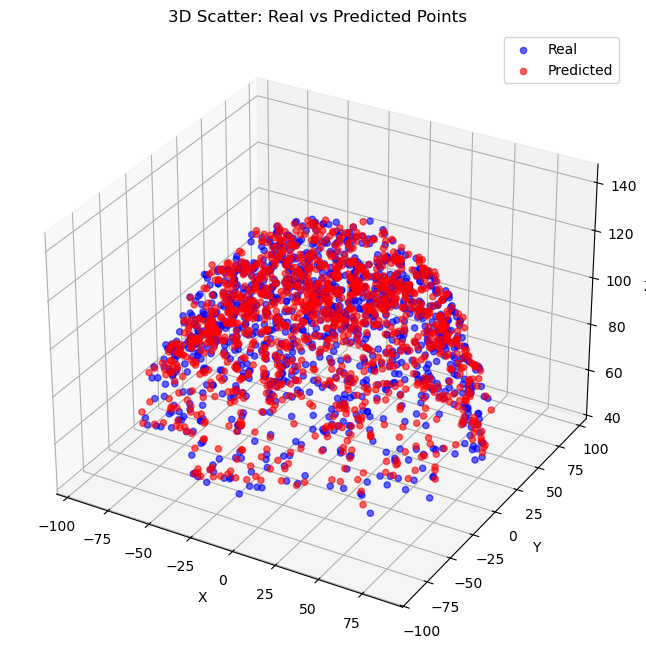

In [ ]:
# =========================================================
#  3D Scatter: Real vs Predicted
# =========================================================
import matplotlib.pyplot as plt
import numpy as np

# Stack real points from test sets of all coordinates
y_true_all = np.vstack([
    final_results[0]['y_test_t'].numpy().ravel(),
    final_results[1]['y_test_t'].numpy().ravel(),
    final_results[2]['y_test_t'].numpy().ravel()
]).T  # shape (n_samples, 3)

# Stack predicted points from saved predictions
y_pred_all = np.vstack([
    final_results[0]['y_pred_test'].numpy().ravel(),
    final_results[1]['y_pred_test'].numpy().ravel(),
    final_results[2]['y_pred_test'].numpy().ravel()
]).T  # shape (n_samples, 3)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_true_all[:, 0], y_true_all[:, 1], y_true_all[:, 2],
           c='blue', label='Real', s=20, alpha=0.6)

ax.scatter(y_pred_all[:, 0], y_pred_all[:, 1], y_pred_all[:, 2],
           c='red', label='Predicted', s=20, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter: Real vs Predicted Points')
ax.legend()
plt.show()



